In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [10]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

# print(train_df.info())
# print(train_df.head())
# print(train_df.describe())
# print(train_df.isnull().sum().sort_values(ascending=False))
missing_values = train_df.isnull().sum() / len(train_df) * 100
cols_to_drop = set(missing_values[missing_values > 50].index)
cols_to_drop.update({'Id', 'LandContour', 'LotConfig', 'LotFrontage', 'Street', 'LotShape', 'LandSlope', 'YearBuilt', 'RoofStyle', 'RoofMatl', 
                     'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                     'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 
                     'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                     'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 
                     '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Condition1', 'Condition2','HouseStyle'})

train_df.drop(columns=cols_to_drop, inplace=True)

def encode_quality_df(df):
    # Funkcja zamienia wartości jakościowe na liczby w całym DataFrame.
    mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0, 
               'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0, 
               'N': 0, 'Y': 1, 'Fin': 3, 'RFn': 2, 'Unf': 1, 
               'Typ': 5, 'Min1': 4, 'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
    return df.replace(mapping).fillna(0)
    

# print("Usunięte kolumny: ", list(cols_to_drop))
train_df = encode_quality_df(train_df)
train_df = pd.get_dummies(train_df, columns=['MSZoning'], dtype=int)
train_df = pd.get_dummies(train_df, columns=['BldgType'], dtype=int)
train_df = pd.get_dummies(train_df, columns=['Neighborhood'], dtype=int)

print(train_df.info())
print(train_df)
train_df.to_csv('dane.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotArea               1460 non-null   int64  
 2   Utilities             1460 non-null   int64  
 3   OverallQual           1460 non-null   int64  
 4   OverallCond           1460 non-null   int64  
 5   YearRemodAdd          1460 non-null   int64  
 6   ExterQual             1460 non-null   int64  
 7   ExterCond             1460 non-null   int64  
 8   HeatingQC             1460 non-null   int64  
 9   CentralAir            1460 non-null   int64  
 10  1stFlrSF              1460 non-null   int64  
 11  2ndFlrSF              1460 non-null   int64  
 12  BedroomAbvGr          1460 non-null   int64  
 13  KitchenAbvGr          1460 non-null   int64  
 14  KitchenQual           1460 non-null   int64  
 15  TotRmsAbvGrd         

C:\Users\zboro\AppData\Local\Temp\ipykernel_5272\2341942067.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(mapping).fillna(0)


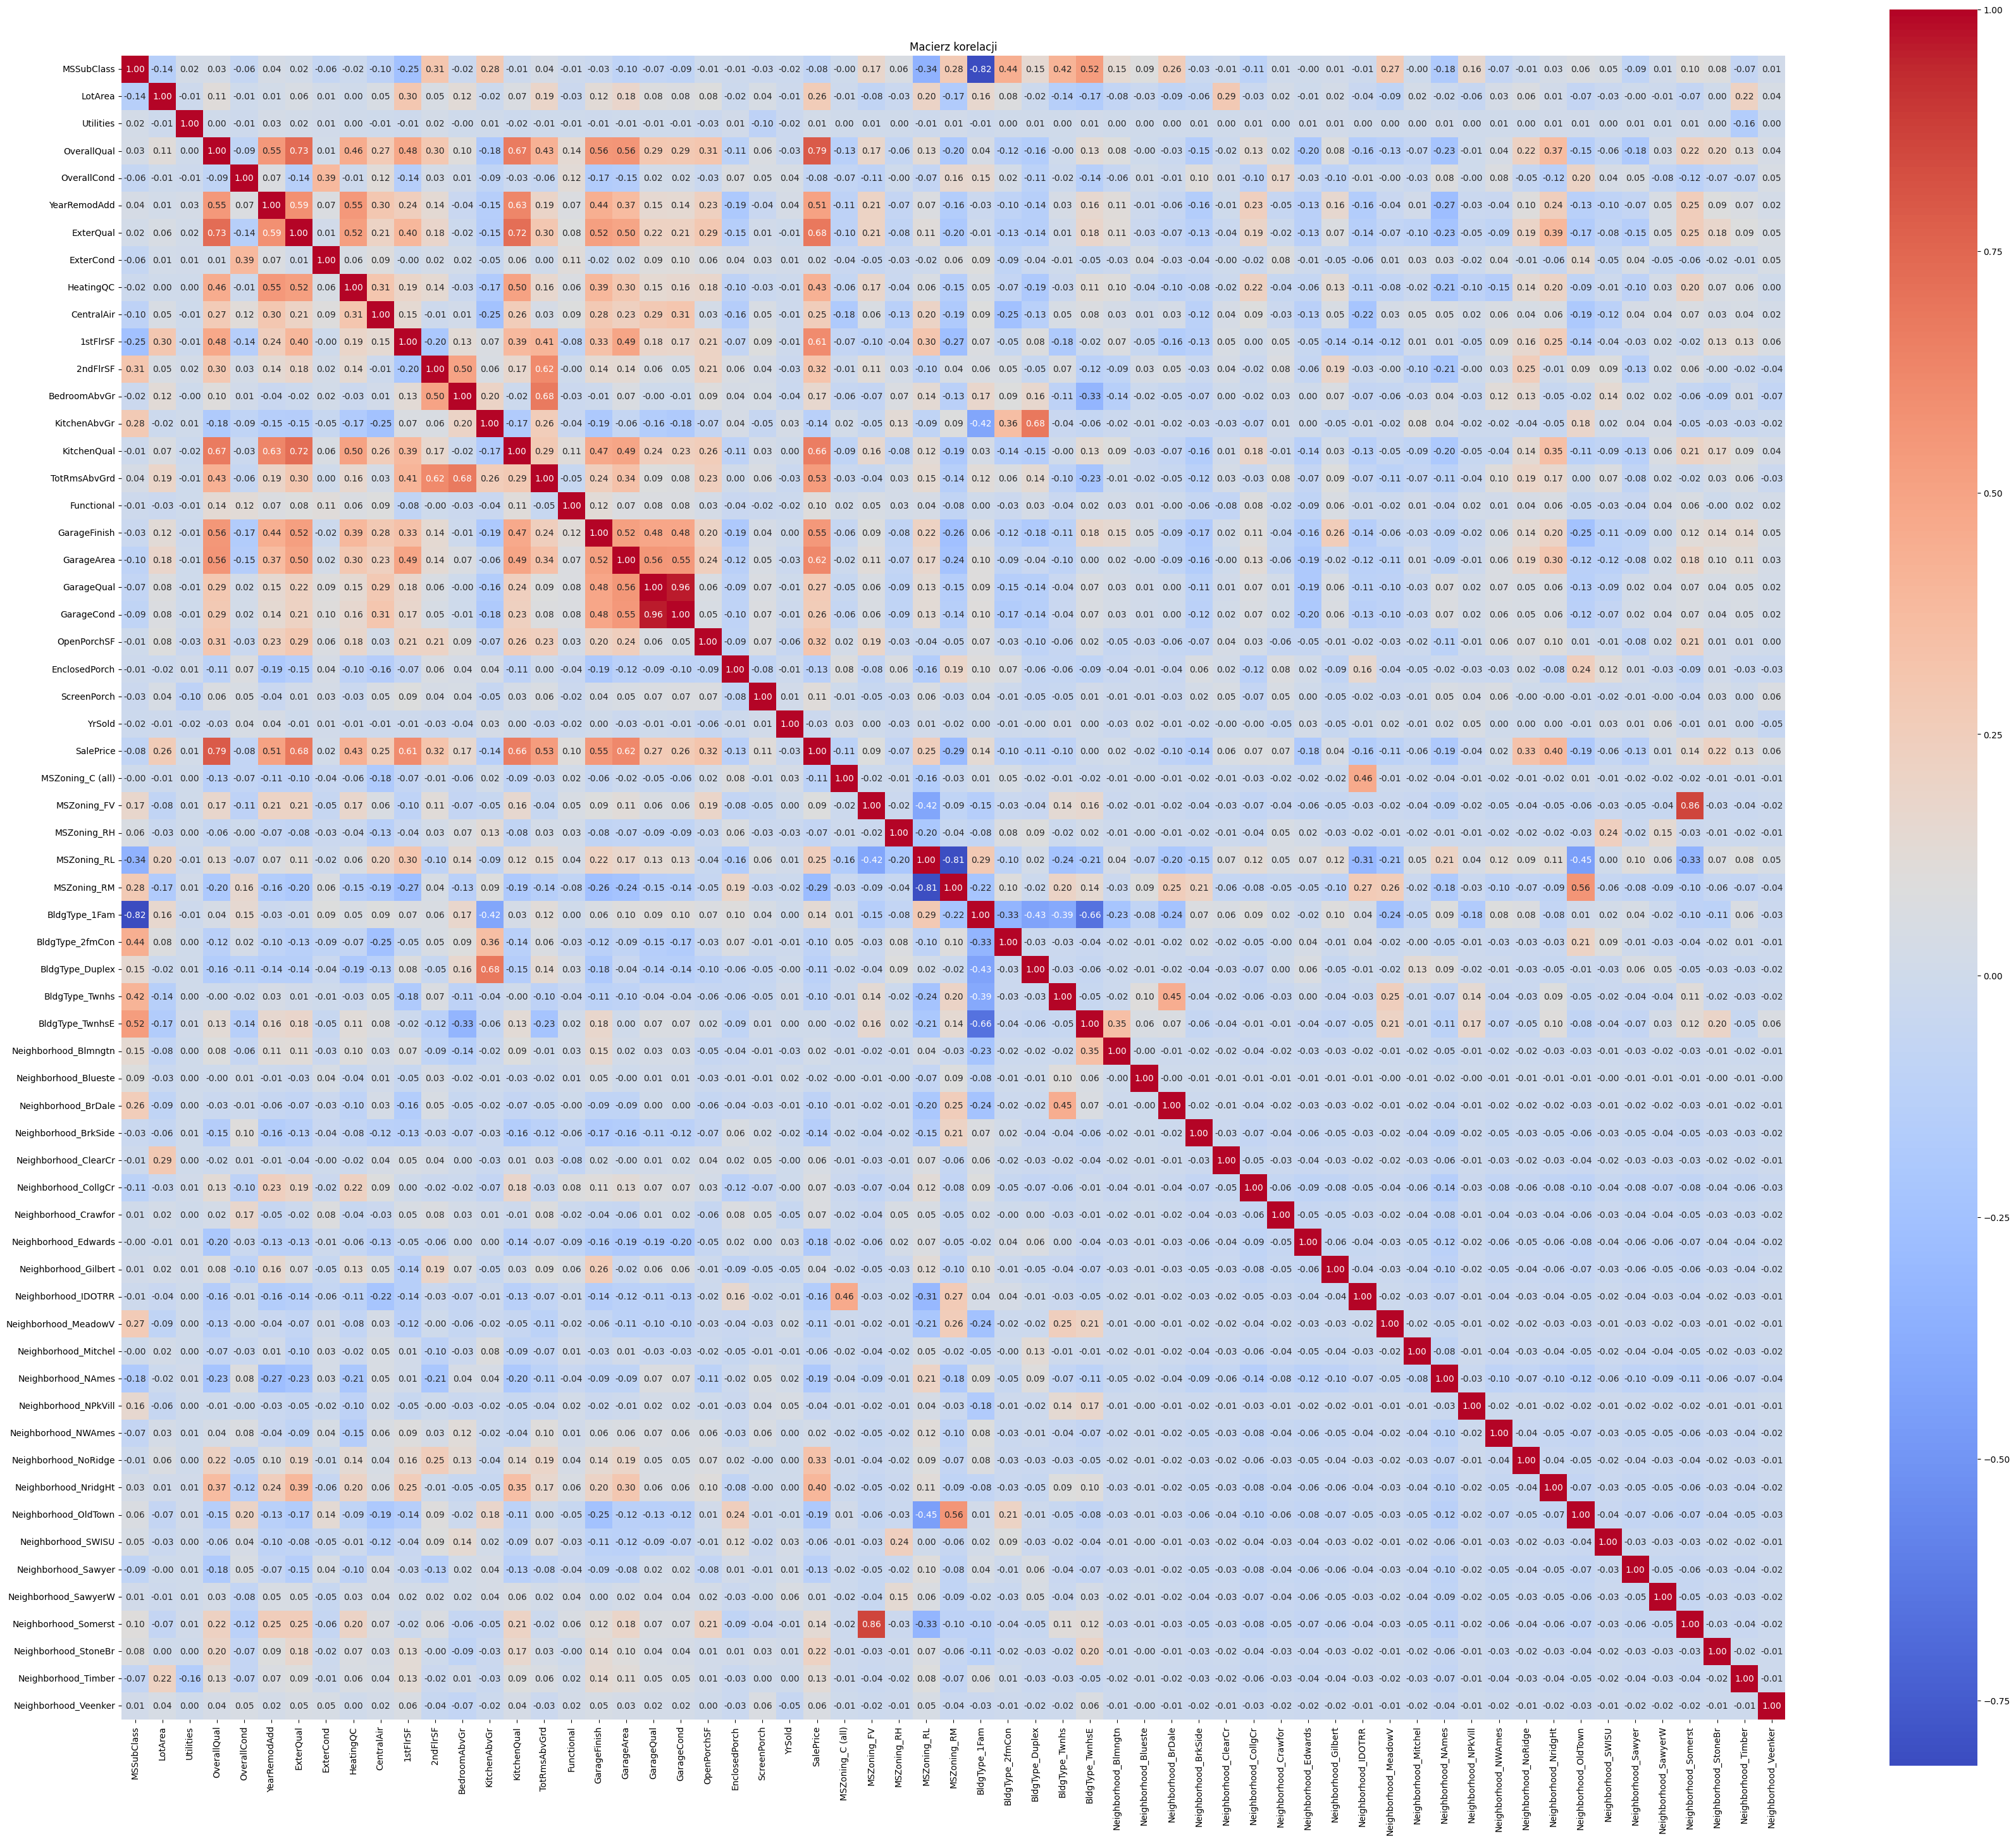

                      MSSubClass   LotArea  Utilities  OverallQual  \
MSSubClass              1.000000 -0.139781   0.022844     0.032628   
LotArea                -0.139781  1.000000  -0.010123     0.105806   
Utilities               0.022844 -0.010123   1.000000     0.001881   
OverallQual             0.032628  0.105806   0.001881     1.000000   
OverallCond            -0.059316 -0.005636  -0.009994    -0.091932   
...                          ...       ...        ...          ...   
Neighborhood_SawyerW    0.006421 -0.012197   0.005373     0.033059   
Neighborhood_Somerst    0.102288 -0.067096   0.006550     0.224010   
Neighborhood_StoneBr    0.082101  0.002052   0.003456     0.196736   
Neighborhood_Timber    -0.067357  0.215400  -0.160151     0.125168   
Neighborhood_Veenker    0.010139  0.044440   0.002281     0.039575   

                      OverallCond  YearRemodAdd  ExterQual  ExterCond  \
MSSubClass              -0.059316      0.040581   0.016178  -0.064686   
LotArea      

In [ ]:
corr_matrix = train_df.corr()

plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .
8})
plt.title('Macierz korelacji')
plt.tight_layout()
plt.show()
print(macierz_korelacji)